In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import seaborn as sns

In [51]:
experiment = '1'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
# name = 'online-agent-percentage'

In [52]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [53]:
def calculate_dispersion(data, run_number):
    dispersions = []
    run_data = data[data['[run number]'] == run_number]
    for _, row in run_data.iterrows():
        opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        mean_opinion = sum(opinions) / len(opinions)
        dispersion = sum(abs(opinion - mean_opinion) for opinion in opinions) / len(opinions)
        dispersions.append(dispersion)
    return dispersions

dispersions1 = calculate_dispersion(data1, 1)
dispersions2 = calculate_dispersion(data2, 1)
dispersions3 = calculate_dispersion(data3, 2)
dispersions4 = calculate_dispersion(data4, 4)

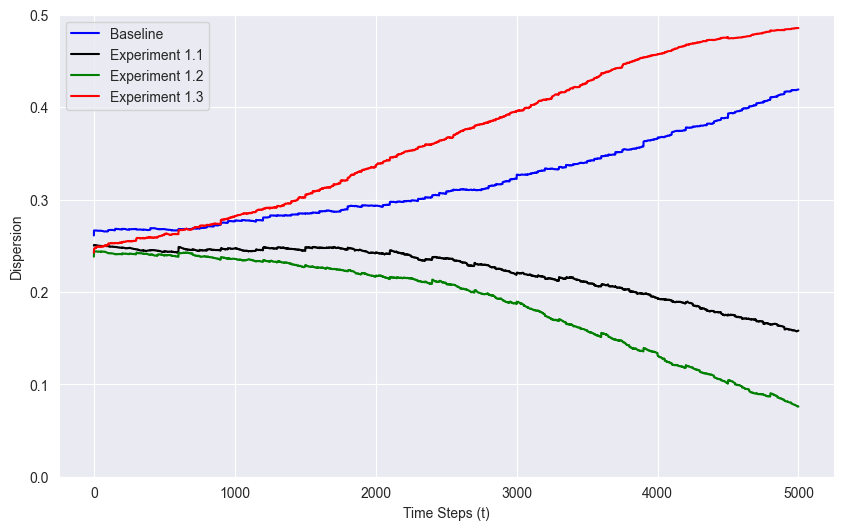

In [54]:
sns.set_palette("tab20")
plt.figure(figsize=(10, 6))
plt.plot(dispersions1, label='Baseline', color='blue')
plt.plot(dispersions2, label=f'Experiment {first}', color='black')
plt.plot(dispersions3, label=f'Experiment {second}', color='green')
plt.plot(dispersions4, label=f'Experiment {third}', color='red')
plt.xlabel('Time Steps (t)')
plt.ylabel('Dispersion')
plt.ylim(0, 0.5)
plt.legend()
plt.grid(True)
plt.savefig(f'plots/polarisation/dispersion/experiment-{experiment}-dispersion.png', dpi=300)
plt.show()